---
# The $k$-Nearest Neighbors


## Introduction

In statistics, the k-nearest neighbors algorithm (k-NN) is a non-parametric supervised learning method first developed by Evelyn Fix and Joseph Hodges in 1951, and later expanded by Thomas Cover. It is used for classification and regression. In both cases, the input consists of the k closest training examples in a data set. The output depends on whether k-NN is used for classification or regression:

In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors. K-NN is mainly used for classification problems.

## Algorithm

<p align="center">
    <img src="KNN1.png" width="500">
</p>

1. Load the data
2. Initialize K to your chosen number of neighbors
3. For each example in the data
 - 3.1 Calculate the distance between the query example and the current example from the data.
 - 3.2 Add the distance and the index of the example to an ordered collection
 
Here, we choose the **Euclidean distance**:
$$
d(p, q) = \sqrt{(p - q)^{T} (p - q)}
$$

4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
5. Pick the first K entries from the sorted collection
6. Get the labels of the selected K entries
7. If regression, return the mean of the K labels
8. If classification, return the mode of the K labels

<p align="center">
    <img src="KNN2.png" width="500">
</p>

---

---
## Dataset and Application-1

We will use the *penguins* dataset loaded from *seaborn* to demonstrate this new technique. 
The Introduction of *penguins* dataset is described in README.md

---

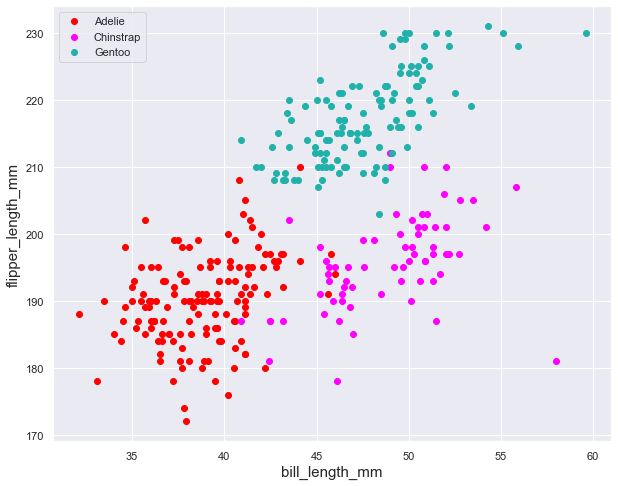

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
penguins = sns.load_dataset("penguins").dropna()
# Plot the data
flowers = ["Adelie", "Chinstrap", "Gentoo"]
colors = ["red", "magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(flowers, colors):
    temp_df = penguins[penguins.species == species]
    ax.scatter(temp_df.bill_length_mm,
               temp_df.flipper_length_mm,
               c = color,
               label = species, 
               )
    
ax.set_xlabel("bill_length_mm", fontsize = 15)
ax.set_ylabel("flipper_length_mm", fontsize = 15)
ax.legend()
plt.show()

In [2]:
#creat a training set and testing set

from sklearn.model_selection import train_test_split

X = penguins[["bill_length_mm", "flipper_length_mm"]].to_numpy()

y = penguins["species"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

---
Define distance
**Euclidean distance**:
$$
d(p, q) = \sqrt{(p - q)^{T} (p - q)}
$$


---

In [3]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

print(f"The distance between point 10 and 67 is {distance(X[10], X[67])}")

The distance between point 10 and 67 is 15.120846537148637


In [4]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

In [5]:
# Test the k_nearest_neighbors function
k_nearest_neighbors(X_test[-1], X_train, y_train, 5)

[[array([ 52., 197.]), 'Chinstrap', 0.7000000000000028],
 [array([ 52.2, 197. ]), 'Chinstrap', 0.9000000000000057],
 [array([ 51.3, 198. ]), 'Chinstrap', 1.0],
 [array([ 50.3, 197. ]), 'Chinstrap', 1.0],
 [array([ 50.9, 196. ]), 'Chinstrap', 1.0770329614269003]]

In [6]:
# Show the true label 
y_test[-1]

'Chinstrap'

In [7]:
# to predict a target label. 
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

In [8]:
# Test our function 
KNN_Predict(X_test[-1], X_train, y_train, 5)

'Chinstrap'

---

Next we write a function to compute the classification error



---

In [9]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, 
                                      training_features, 
                                      training_labels, 
                                      k)
    return error/len(test_features)

In [10]:
# Test our function
classification_error(X_test, y_test, X_train, y_train, 7)

0.00909090909090909

In [11]:
possible_k = [k for k in range(3, 26, 2)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

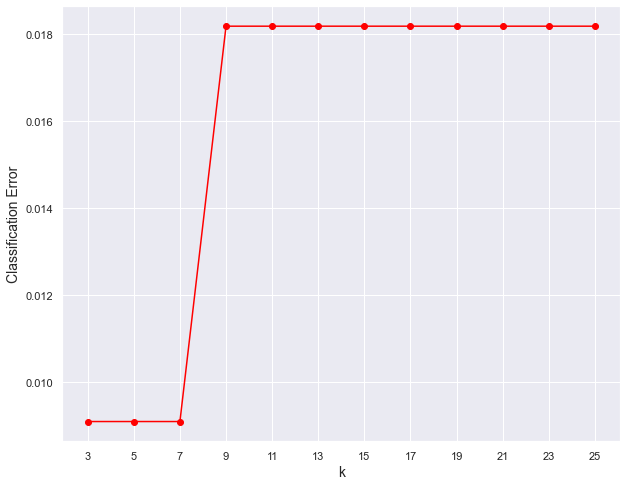

In [12]:
plt.figure(figsize = (10, 8))
plt.plot(possible_k, errors, color = 'red', marker = "o")
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.show()

k <= 7 has a lower classification error of less than 0.010; from k=7 to 9, the classification error is increasing; k>=9 has a higher classification error of about 0.0182.

---
## Dataset and Application-2 (Recommender Systems with $k$-Nearest Neighbors)

We will use the *songs*(Spotify 2010 - 2019 Top 100) dataset from kaggle.com to demonstrate this new technique. 
The Introduction of *songs* dataset is described in README.md

---

In [67]:
 # Read the songs data
songs = pd.read_csv('/Users/rachelan/Desktop/INDE577/Data_Science_and_Machine_Learning_Spring_2022-main/Lecture_7/Spotify 2010 - 2019 Top 100.csv')
songs

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019.0,2020‑08‑20,138.0,58.0,53.0,-6.0,10.0,59.0,214.0,1.0,10.0,67.0,2019.0,Duo
999,The London (feat. J. Cole & Travis Scott),Young Thug,atl hip hop,2019.0,2020‑06‑22,98.0,59.0,80.0,-7.0,13.0,18.0,200.0,2.0,15.0,75.0,2019.0,Solo
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# Set the index attribute of out DataFrame to be same as "title" column
songs.set_index("title", drop = False, inplace = True)
songs

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
title,,,,,,,,,,,,,,,,,
STARSTRUKK (feat. Katy Perry),STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
My First Kiss (feat. Ke$ha),My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
I Need A Dollar,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
Airplanes (feat. Hayley Williams of Paramore),Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
Nothin' on You (feat. Bruno Mars),Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Strike a Pose (feat. Aitch),Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019.0,2020‑08‑20,138.0,58.0,53.0,-6.0,10.0,59.0,214.0,1.0,10.0,67.0,2019.0,Duo
The London (feat. J. Cole & Travis Scott),The London (feat. J. Cole & Travis Scott),Young Thug,atl hip hop,2019.0,2020‑06‑22,98.0,59.0,80.0,-7.0,13.0,18.0,200.0,2.0,15.0,75.0,2019.0,Solo
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
# Find the vector of data associated with "I Need A Dollar"
songs.loc["I Need A Dollar"]

title            I Need A Dollar
artist                Aloe Blacc
top genre               pop soul
year released             2010.0
added                 2022‑02‑17
bpm                         95.0
nrgy                        48.0
dnce                        84.0
dB                          -7.0
live                         9.0
val                         96.0
dur                        243.0
acous                       20.0
spch                         3.0
pop                         72.0
top year                  2010.0
artist type                 Solo
Name: I Need A Dollar, dtype: object

In [70]:
# View the columns of our DataFrame
songs.columns

Index(['title', 'artist', 'top genre', 'year released', 'added', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop', 'top year',
       'artist type'],
      dtype='object')

In [71]:
songs.title

title
STARSTRUKK (feat. Katy Perry)                                    STARSTRUKK (feat. Katy Perry)
My First Kiss (feat. Ke$ha)                                        My First Kiss (feat. Ke$ha)
I Need A Dollar                                                                I Need A Dollar
Airplanes (feat. Hayley Williams of Paramore)    Airplanes (feat. Hayley Williams of Paramore)
Nothin' on You (feat. Bruno Mars)                            Nothin' on You (feat. Bruno Mars)
                                                                     ...                      
Strike a Pose (feat. Aitch)                                        Strike a Pose (feat. Aitch)
The London (feat. J. Cole & Travis Scott)            The London (feat. J. Cole & Travis Scott)
NaN                                                                                        NaN
NaN                                                                                        NaN
NaN                                         

In [74]:
def song_recommendations(title, df, k):
    categories = [ 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop', 'top year',]

    X = df[categories].dropna().to_numpy()
    y = df["title"].to_numpy()

    point = df[categories].loc[title].to_numpy()
    print(point)
    #for p, label in zip(X, y):
        #print(point, p)
    neighbors = k_nearest_neighbors(point, X, y, k+1)
    return [x[1] for x in neighbors[1:]]

recommendations = song_recommendations("I Need A Dollar", songs, 7)


print("Song Recommendations")
for i, song in enumerate(recommendations):
    print(f"{i+1}. {song}")

[  95.   48.   84.   -7.    9.   96.  243.   20.    3.   72. 2010.]
Song Recommendations
1. Sing
2. Options
3. Ayo
4. Feels (feat. Pharrell Williams, Katy Perry & Big Sean)
5. Blurred Lines
6. Stuck Like Glue
7. Closer


In [76]:
songs.loc["Sing"]

title                  Sing
artist           Ed Sheeran
top genre               pop
year released        2014.0
added            2020‑06‑10
bpm                   120.0
nrgy                   67.0
dnce                   82.0
dB                     -4.0
live                    6.0
val                    94.0
dur                   235.0
acous                  30.0
spch                    5.0
pop                    75.0
top year             2014.0
artist type            Solo
Name: Sing, dtype: object

## Reference
Badgujar, A. (2022, April 27). Spotify Top 100 songs of 2010-2019. Kaggle. Retrieved May 7, 2022, from https://www.kaggle.com/datasets/amey22/spotify-top-100-songs-of-2010-2019 

Christopher, A. (2021, February 3). K-Nearest Neighbor. Medium. Retrieved May 7, 2022, from https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4 

Harrison, O. (2019, July 14). Machine learning basics with the K-nearest neighbors algorithm. Medium. Retrieved May 7, 2022, from https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761 

Wikimedia Foundation. (2022, March 15). K-nearest neighbors algorithm. Wikipedia. Retrieved May 7, 2022, from https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm 